<a href="https://colab.research.google.com/github/RodrigoMunozP/ReconocimientoDigitos/blob/main/ReconocimientoDigitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
seed=10
np.random.seed(seed)
tf.random.set_seed(seed)  # Fijar semilla para TensorFlow
(X_train,y_train), (X_test, y_test)= mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


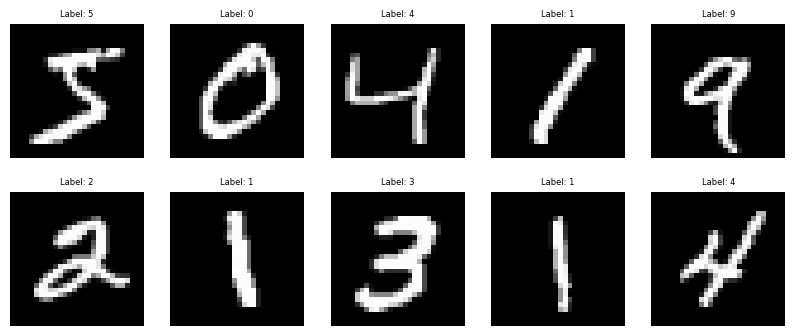

In [ ]:
def plot_images(images, labels, num_rows=2, num_cols=5):
    """Función para trazar imágenes del conjunto de datos con sus etiquetas."""
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(f"Label: {labels[i]}", fontsize=6)  # Ajusta el tamaño de la fuente aquí

        ax.axis('off')
    plt.show()

# Mostrar las primeras 10 imágenes y sus etiquetas
plot_images(X_train, y_train, num_rows=2, num_cols=5)

In [ ]:
    datagen = ImageDataGenerator(
    rotation_range=10,          # Rango de rotación en grados
    width_shift_range=0.1,      # Desplazamiento horizontal fracción de la anchura total
    height_shift_range=0.1,     # Desplazamiento vertical fracción de la altura total
    shear_range=0.2,            # Intensidad de la deformación de corte
    zoom_range=0.2,             # Rango de zoom
    horizontal_flip=True,       # Volteo horizontal aleatorio
    vertical_flip=False,        # No utilizar volteo vertical en imágenes de dígitos
    rescale=1./255
)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [ ]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
num_classes=y_train.shape[1]


In [ ]:
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5), padding='same',input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
datagen.fit(X_train)

In [ ]:
model=cnn_model()
model.fit(datagen.flow(X_train, y_train, batch_size=512), validation_data=(X_test, y_test), epochs=5, verbose=2)
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/5
118/118 - 24s - loss: 0.9234 - accuracy: 0.6855 - val_loss: 25.5891 - val_accuracy: 0.9305 - 24s/epoch - 204ms/step
Epoch 2/5
118/118 - 19s - loss: 0.3771 - accuracy: 0.8787 - val_loss: 16.2116 - val_accuracy: 0.9599 - 19s/epoch - 162ms/step
Epoch 3/5
118/118 - 19s - loss: 0.2676 - accuracy: 0.9165 - val_loss: 10.1508 - val_accuracy: 0.9738 - 19s/epoch - 159ms/step
Epoch 4/5
118/118 - 19s - loss: 0.2178 - accuracy: 0.9323 - val_loss: 10.0755 - val_accuracy: 0.9747 - 19s/epoch - 162ms/step
Epoch 5/5
118/118 - 19s - loss: 0.1795 - accuracy: 0.9447 - val_loss: 8.2497 - val_accuracy: 0.9797 - 19s/epoch - 163ms/step
The error is: 2.03%
